In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Task 1: Show the relative importance of input variables

In [5]:
df_target = pd.read_csv('../lucas_organic_carbon/target/lucas_organic_carbon_target.csv')
df_training = pd.read_csv('../lucas_organic_carbon/training_test/lucas_organic_carbon_training_and_test_data.csv')

df_combined = pd.merge(df_training, df_target, left_index=True, right_index=True)

In [6]:
predictors = df_combined.columns[:-1]
target = df_combined.columns[-1]

In [7]:
X = df_combined[predictors]
y = df_combined[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
model = RandomForestClassifier(
        max_depth = 14,
        n_estimators= 384,
)

In [18]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=384)

In [19]:
importances = model.feature_importances_

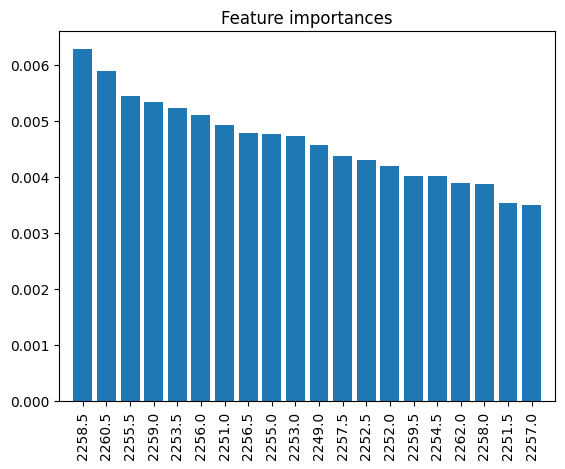

In [20]:
# plot 20 most important features
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(20), importances[indices[:20]], align="center")
plt.xticks(range(20), X.columns[indices[:20]], rotation=90)
plt.xlim([-1, 20])
plt.show()


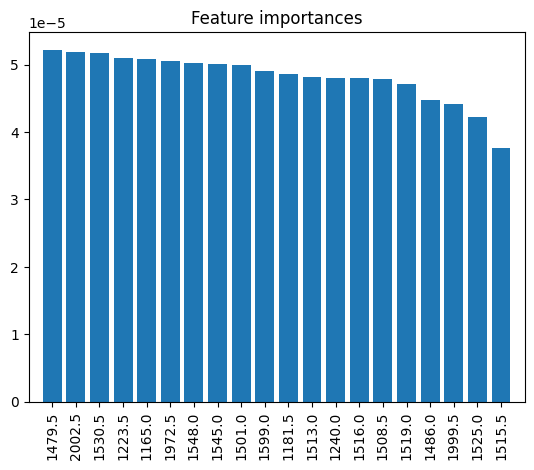

In [22]:
# plot 20 least important features
plt.figure()
plt.title("Feature importances")
plt.bar(range(20), importances[indices[-20:]], align="center")
plt.xticks(range(20), X.columns[indices[-20:]], rotation=90)
plt.xlim([-1, 20])
plt.show()


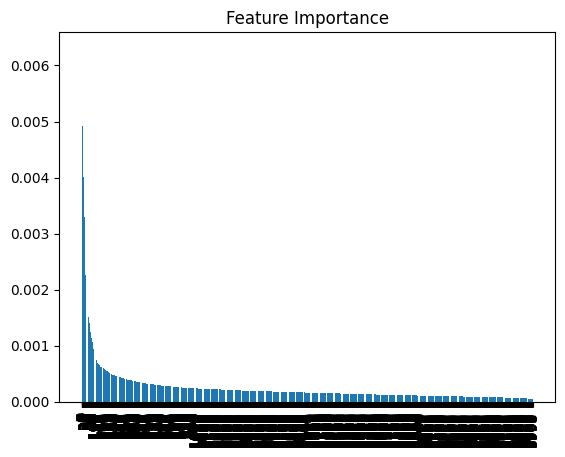

In [23]:
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), rotation=90)
plt.show()
